In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from pandas_profiling import ProfileReport

print("Pandas Version: " + pd.__version__)
print("Numpy Version: " + np.__version__)

Pandas Version: 1.2.0
Numpy Version: 1.18.5


In [2]:
trips = pd.read_csv("../data/clean/trips.csv", parse_dates=['date_from', 'date_until'])

In [3]:
trips.head()

,bike_id,user_id,date_from,date_until,from_station_name,from_station_id,to_station_name,to_station_id,booked_via,duration_in_min
0,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,U-Bahn Baumwall,214170,Mönckebergstraße / Rosenstraße,131880,iPhone SRH,16
1,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,Bahnhof Altona Ost/Max-Brauer-Allee,131646,Schulterblatt/Eifflerstraße,131648,Android SRH,18
2,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,Weidestraße/Biedermannplatz,211922,Jarrestraße / Rambatzweg,138376,Techniker HH_119 (-2334-),13
3,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,Mundsburg / Schürbeker Straße,140799,Bartholomäusstraße/Beim Alten Schützenhof,211923,iPhone SRH,8
4,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,Krausestraße/Eilbektal,208295,Lortzingstraße/Friedrichsberger Straße,213833,iPhone SRH,4


In [4]:
stations = pd.read_csv("../data/clean/stations.csv")

In [5]:
stations.head()

,station_name
0,Allende-Platz/Grindelhof
1,Alsenstraße/Düppelstraße
2,Alsterdorf Markt/Evangelische Stiftung
3,Alsterdorfer Straße/Fuhlsbüttler Straße
4,Alsterschwimmhalle/Ifflandstraße


In [6]:
weather = pd.read_csv("../data/clean/weather.csv", index_col=0, parse_dates=['datetime'])

In [7]:
weather.head()

,datetime,precip_intensity,precip_probability,precip_type,temperature,humidity,wind_speed,wind_bearing,uv_index,visibility
0,2014-01-01 00:00:00,0.0,0.0,none,1.93,0.81,3.91,161.0,0.0,9.988
1,2014-01-01 01:00:00,0.0,0.0,none,1.94,0.85,4.56,140.0,0.0,6.004
2,2014-01-01 02:00:00,0.0,0.0,none,1.81,0.85,4.12,143.0,0.0,9.988
3,2014-01-01 03:00:00,0.0,0.0,none,1.75,0.81,3.70,154.0,0.0,9.988
4,2014-01-01 04:00:00,0.0,0.0,none,1.72,0.82,4.36,149.0,0.0,9.988


### Counting check-ins and check-outs per station per hour

In [8]:
trips_slice = trips[['date_from', 'date_until', 'from_station_name', 'to_station_name']].copy()

In [9]:
check_ins = trips_slice.groupby([pd.Grouper(key='date_until', freq='H'), 'to_station_name']).size().to_frame('check_ins')
check_ins.index.rename(['datetime', 'station_name'], inplace=True)
check_ins

check_ins
datetime            station_name                                      
2014-01-01 00:00:00 Alsenstraße/Düppelstraße                         3
                    Amsinckstraße/ Nordkanalbrücke                   2
                    Bahnhof Altona West / Busbahnhof                 1
                    Bahnhof Dammtor Süd / Marseiller Straße          1
                    Bebelallee/Meenkwiese                            2
...                                                                ...
2017-05-16 08:00:00 Versmannstraße/Am Hannoverschen Bahnhof          1
                    Wandsbeker Chaussee/ Börnestraße                 1
                    Weidestraße /Johannes-Prassek-Park               1
                    Wentorfer Straße/Bezirksamt Bergedorf            1
                    Winterhuder Weg/ Zimmerstraße                    1

[2459885 rows x 1 columns]

In [10]:
check_outs = trips_slice.groupby([pd.Grouper(freq='H', key='date_from'), 'from_station_name']).size().to_frame('check_outs')
check_outs.index.rename(['datetime', 'station_name'], inplace=True)
check_outs

check_outs
datetime            station_name                                           
2014-01-01 00:00:00 Allende-Platz/Grindelhof                              5
                    Auf dem Sande/Kehrwieder-MiniaturWunderland           2
                    Bahnhof Altona Ost/Max-Brauer-Allee                   3
                    Bahnhof Altona West / Busbahnhof                      2
                    Bahnhof Dammtor Nord // Theodor-Heuss-Platz           2
...                                                                     ...
2017-05-16 08:00:00 Landungsbrücke/Hafentor                               1
                    Lappenbergsallee / Bei der Apostelkirche              1
                    Moorstraße/Bahnhof Harburg                            1
                    Mönckebergstraße / Steintorwall                       1
                    Osdorfer Landstraße/ Elbe-Einkaufszentrum             1

[2443453 rows x 1 columns]

### Create empty data set with stats per station per hour and fill in accumulated data

In [ ]:
from datetime import datetime

# create date range
start_date = datetime(2014, 1, 1, 0)
end_date = datetime(2017, 5, 15, 11, 59, 59)
date_range = pd.date_range(start_date, end_date, freq='H')

station_names = sorted(stations.station_name.values)

# create multiindex from hourly timestamps and station names
index = pd.MultiIndex.from_product([date_range, station_names], names=['datetime', 'station_name'])

# create empty data set with index
empty_df = pd.DataFrame(index=index)

# insert calculations and fill missing values with 0, meaning no check-outs or check-ins observed
station_count = empty_df.join(check_ins).join(check_outs).fillna(0)
station_count.check_ins = station_count.check_ins.astype(int)
station_count.check_outs = station_count.check_outs.astype(int)

# calculate change in bike inventory
station_count['diff'] = (station_count['check_ins'] - station_count['check_outs'])

station_count.reset_index(inplace=True)

In [32]:
station_count.head(10)

,datetime,station_name,check_ins,check_outs,diff
0,2014-01-01,Allende-Platz/Grindelhof,0,5,-5
1,2014-01-01,Alsenstraße/Düppelstraße,3,0,3
2,2014-01-01,Alsterdorf Markt/Evangelische Stiftung,0,0,0
3,2014-01-01,Alsterdorfer Straße/Fuhlsbüttler Straße,0,0,0
4,2014-01-01,Alsterschwimmhalle/Ifflandstraße,0,0,0
5,2014-01-01,Alter Postweg / Heimfelder Straße,0,0,0
6,2014-01-01,Alter Wall/Adolphsbrücke,0,0,0
7,2014-01-01,Am Kaiserkai/Großer Grasbrook,0,0,0
8,2014-01-01,Amsinckstraße/ Nordkanalbrücke,2,0,2
9,2014-01-01,Auf dem Sande/Kehrwieder-MiniaturWunderland,0,2,-2


In [37]:
sample_timestamp = '2016-10-25 12:00:00'

In [38]:
weather[weather.datetime == sample_timestamp]

,datetime,precip_intensity,precip_probability,precip_type,temperature,humidity,wind_speed,wind_bearing,uv_index,visibility
24683,2016-10-25 12:00:00,0.0,0.0,none,8.37,0.92,1.51,357.0,1.0,8.817


In [39]:
station_count[station_count.datetime == sample_timestamp]

,datetime,station_name,check_ins,check_outs,diff
5331744,2016-10-25 12:00:00,Allende-Platz/Grindelhof,13,7,6
5331745,2016-10-25 12:00:00,Alsenstraße/Düppelstraße,4,8,-4
5331746,2016-10-25 12:00:00,Alsterdorf Markt/Evangelische Stiftung,0,0,0
5331747,2016-10-25 12:00:00,Alsterdorfer Straße/Fuhlsbüttler Straße,1,1,0
5331748,2016-10-25 12:00:00,Alsterschwimmhalle/Ifflandstraße,1,0,1
...,...,...,...,...,...
5331955,2016-10-25 12:00:00,Wiesendamm/Roggenkamp,0,1,-1
5331956,2016-10-25 12:00:00,Wilhelmsburger Platz/Zur Schleuse,0,3,-3
5331957,2016-10-25 12:00:00,Winterhuder Weg/ Zimmerstraße,0,2,-2
5331958,2016-10-25 12:00:00,Zentralbibliothek / Münzstraße,4,3,1


In [48]:
tmp = pd.merge(station_count, weather, on='datetime', how='left', sort=False)
tmp[tmp.datetime == sample_timestamp]

,datetime,station_name,check_ins,check_outs,diff,precip_intensity,precip_probability,precip_type,temperature,humidity,wind_speed,wind_bearing,uv_index,visibility
5331744,2016-10-25 12:00:00,Allende-Platz/Grindelhof,13,7,6,0.0,0.0,none,8.37,0.92,1.51,357.0,1.0,8.817
5331745,2016-10-25 12:00:00,Alsenstraße/Düppelstraße,4,8,-4,0.0,0.0,none,8.37,0.92,1.51,357.0,1.0,8.817
5331746,2016-10-25 12:00:00,Alsterdorf Markt/Evangelische Stiftung,0,0,0,0.0,0.0,none,8.37,0.92,1.51,357.0,1.0,8.817
5331747,2016-10-25 12:00:00,Alsterdorfer Straße/Fuhlsbüttler Straße,1,1,0,0.0,0.0,none,8.37,0.92,1.51,357.0,1.0,8.817
5331748,2016-10-25 12:00:00,Alsterschwimmhalle/Ifflandstraße,1,0,1,0.0,0.0,none,8.37,0.92,1.51,357.0,1.0,8.817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5331955,2016-10-25 12:00:00,Wiesendamm/Roggenkamp,0,1,-1,0.0,0.0,none,8.37,0.92,1.51,357.0,1.0,8.817
5331956,2016-10-25 12:00:00,Wilhelmsburger Platz/Zur Schleuse,0,3,-3,0.0,0.0,none,8.37,0.92,1.51,357.0,1.0,8.817
5331957,2016-10-25 12:00:00,Winterhuder Weg/ Zimmerstraße,0,2,-2,0.0,0.0,none,8.37,0.92,1.51,357.0,1.0,8.817
5331958,2016-10-25 12:00:00,Zentralbibliothek / Münzstraße,4,3,1,0.0,0.0,none,8.37,0.92,1.51,357.0,1.0,8.817


In [45]:
tmp.to_csv("../data/station_count.csv")

In [54]:
test_slice = tmp[tmp.station_name == 'Mönckebergstraße / Rosenstraße']
test_slice

,datetime,station_name,check_ins,check_outs,diff,precip_intensity,precip_probability,precip_type,temperature,humidity,wind_speed,wind_bearing,uv_index,visibility
141,2014-01-01 00:00:00,Mönckebergstraße / Rosenstraße,2,0,2,0.0000,0.00,none,1.93,0.81,3.91,161.0,0.0,9.988
357,2014-01-01 01:00:00,Mönckebergstraße / Rosenstraße,0,0,0,0.0000,0.00,none,1.94,0.85,4.56,140.0,0.0,6.004
573,2014-01-01 02:00:00,Mönckebergstraße / Rosenstraße,0,0,0,0.0000,0.00,none,1.81,0.85,4.12,143.0,0.0,9.988
789,2014-01-01 03:00:00,Mönckebergstraße / Rosenstraße,0,2,-2,0.0000,0.00,none,1.75,0.81,3.70,154.0,0.0,9.988
1005,2014-01-01 04:00:00,Mönckebergstraße / Rosenstraße,0,1,-1,0.0000,0.00,none,1.72,0.82,4.36,149.0,0.0,9.988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6377973,2017-05-15 07:00:00,Mönckebergstraße / Rosenstraße,2,5,-3,0.0107,0.07,rain,11.63,0.88,2.72,270.0,0.0,10.003
6378189,2017-05-15 08:00:00,Mönckebergstraße / Rosenstraße,5,3,2,0.0000,0.00,none,12.08,0.86,3.69,280.0,1.0,10.003
6378405,2017-05-15 09:00:00,Mönckebergstraße / Rosenstraße,7,2,5,0.0092,0.04,rain,12.44,0.81,3.69,273.0,2.0,10.003
6378621,2017-05-15 10:00:00,Mönckebergstraße / Rosenstraße,1,0,1,0.0000,0.00,none,12.94,0.77,3.59,286.0,3.0,10.003


In [55]:
start_date = pd.to_datetime('2016-06-06')
end_date = pd.to_datetime('2016-06-12')
test_slice.loc[(test_slice['datetime'] >= start_date) & (tmp['datetime'] <= end_date)]

,datetime,station_name,check_ins,check_outs,diff,precip_intensity,precip_probability,precip_type,temperature,humidity,wind_speed,wind_bearing,uv_index,visibility
4598349,2016-06-06 00:00:00,Mönckebergstraße / Rosenstraße,0,1,-1,0.0,0.0,none,17.44,0.83,0.96,25.0,0.00,10.003
4598565,2016-06-06 01:00:00,Mönckebergstraße / Rosenstraße,0,2,-2,0.0,0.0,none,16.84,0.83,0.73,314.0,0.00,10.003
4598781,2016-06-06 02:00:00,Mönckebergstraße / Rosenstraße,0,0,0,0.0,0.0,none,15.54,0.85,0.55,347.0,0.00,10.003
4598997,2016-06-06 03:00:00,Mönckebergstraße / Rosenstraße,1,0,1,0.0,0.0,none,14.96,0.89,0.74,324.0,0.00,10.003
4599213,2016-06-06 04:00:00,Mönckebergstraße / Rosenstraße,0,0,0,0.0,0.0,none,13.85,0.90,0.68,54.0,0.00,10.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4628589,2016-06-11 20:00:00,Mönckebergstraße / Rosenstraße,3,3,0,0.0,0.0,none,17.92,0.40,3.45,58.0,1.50,10.003
4628805,2016-06-11 21:00:00,Mönckebergstraße / Rosenstraße,2,1,1,0.0,0.0,none,16.61,0.41,2.75,46.0,0.75,10.003
4629021,2016-06-11 22:00:00,Mönckebergstraße / Rosenstraße,0,0,0,0.0,0.0,none,15.74,0.43,2.93,41.0,0.00,10.003
4629237,2016-06-11 23:00:00,Mönckebergstraße / Rosenstraße,0,1,-1,0.0,0.0,none,15.19,0.45,2.05,34.0,0.00,10.003


<AxesSubplot:>

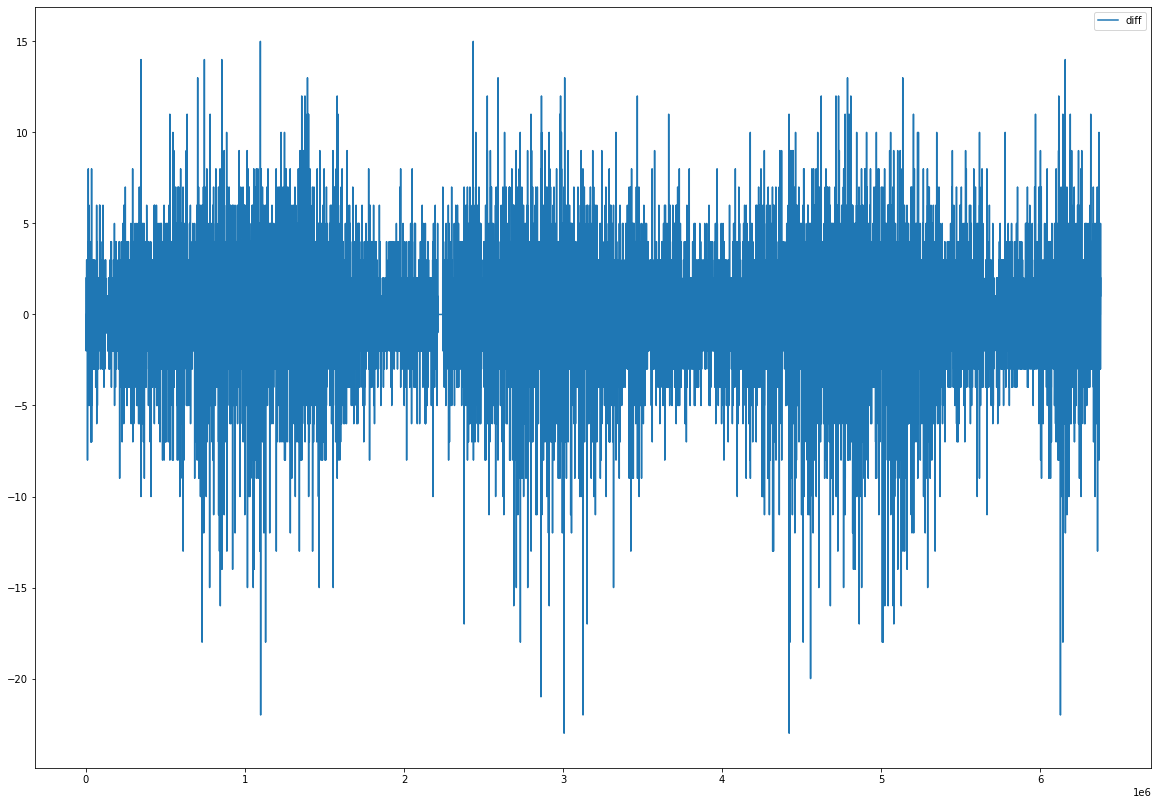

In [57]:
test_slice.plot(y='diff', figsize=(20,14))

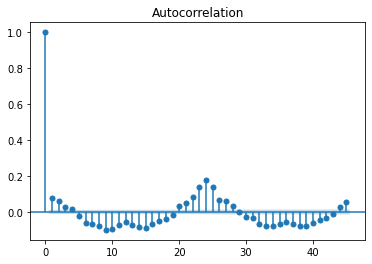

In [58]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(test_slice[['diff']])
plt.show()

In [59]:
# ARIMA
model = sm.tsa.arima.ARIMA(test_slice[['diff']], order=(5,1,0))
model_fit = model.fit()

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [60]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                29532
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -69621.389
Date:                Sun, 17 Jan 2021   AIC                         139254.778
Time:                        15:53:12   BIC                         139304.537
Sample:                             0   HQIC                        139270.756
                              - 29532                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7593      0.004   -203.695      0.000      -0.767      -0.752
ar.L2         -0.5537      0.005   -114.712      0.000      -0.563      -0.544
ar.L3         -0.3922      0.005    -72.853      0.000      -0.403      -0.382
ar.L4         -0.2359      0.006    -42.726      0.000      -0.247      -0.225
ar.L5         -0.1070      0.005    -23.138      0.000      -0.116      -0.098
sigma2         6.5360      0.024    276.664      0.000       6.490       6.582
===================================================================================
Ljung-Box (L1) (Q):                   3.62   Jarque-Bera (JB):             95537.19
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -1.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""